In this notebook, we will make exploratory data analysis for the auto-mpg dataset and build a machine learning model to predict MPG

In [1]:
#Importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#Opening file
df = pd.read_csv('auto-mpg.csv')

#Checking the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
#Converting data types
df['cylinders'] = df.cylinders.astype('category')
df['displacement'] = df.displacement.astype('int64')
df['origin'] = df.origin.astype('category')
df['car name'] = df['car name'].astype('string')

In [4]:
#The horsepower column couldn't be converted to int64 because it contains blank values filled with '?'
display(df[df.horsepower == '?'].head())

#The blank horsepower cells will be filled with the mean of the entries of the same number of cylinders. (4, 6 cylinders)
df[df.horsepower == '?'].cylinders.unique()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98,?,2046,19.0,71,1,ford pinto
126,21.0,6,200,?,2875,17.0,74,1,ford maverick
330,40.9,4,85,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100,?,2320,15.8,81,2,renault 18i


[4, 6]
Categories (2, int64): [4, 6]

In [5]:
#But the is no way to calculate the mean unless we convert the type of the horsepower column to 'int64'
#So we will change '?' to 0, convert and then fill them with the mean

df.horsepower.replace('?', 0, inplace = True)
df['horsepower'] = df.horsepower.astype('int64')

#Mean for 4 and 6 cylinder cars
mean_4 = np.mean(df[(df.cylinders == 4) & (df.horsepower != 0)].horsepower)
mean_6 = np.mean(df[(df.cylinders == 6) & (df.horsepower != 0)].horsepower)

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

df.horsepower.loc[(df.cylinders == 4) & (df.horsepower == 0)] = mean_4
df.horsepower.loc[(df.cylinders == 6) & (df.horsepower == 0)] = mean_6

#We could use an imputer but this way is more precise

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    int64   
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    string  
dtypes: category(2), float64(3), int64(3), string(1)
memory usage: 23.0 KB


In [8]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.0,398.000000,398.000000,398.000000,398.000000,398.000000,398.0,398
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,305
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,ford pinto
freq,NaN,204.0,NaN,NaN,NaN,NaN,NaN,249.0,6
mean,23.514573,NaN,193.424623,104.132947,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,NaN,104.271000,38.310886,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,NaN,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,NaN,104.250000,76.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,NaN,148.500000,92.000000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,NaN,262.000000,125.000000,3608.000000,17.175000,79.000000,NaN,NaN


Plots and Analysis

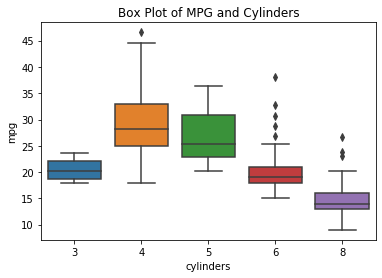

In [9]:
sns.boxplot(data=df, y='mpg', x='cylinders')
plt.title('Box Plot of MPG and Cylinders')
plt.show()

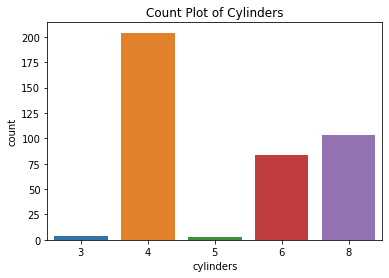

In [10]:
sns.countplot(df.cylinders)
plt.title('Count Plot of Cylinders')
plt.show()

In [11]:
#From the previous two figures, we can see that the 4 cylinder cars are the most common and they give the best median MPG

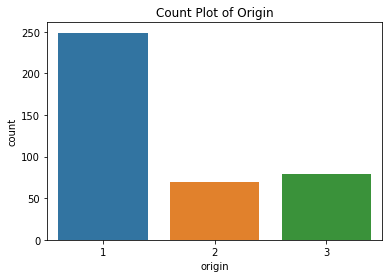

In [12]:
sns.countplot(df.origin)
plt.title('Count Plot of Origin')
plt.show()
#Origin 1 = USA  #Origin 2 = Europe  #Origin 3 = Japan

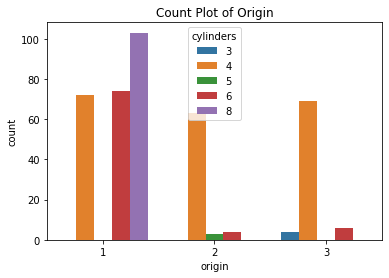

In [13]:
sns.countplot(df.origin, hue=df.cylinders)
plt.title('Count Plot of Origin')
plt.show()

In [14]:
#From the previous two figures, we can see that more than half the cars in the data are american and most 6 & 8 cylinder cars are from The USA

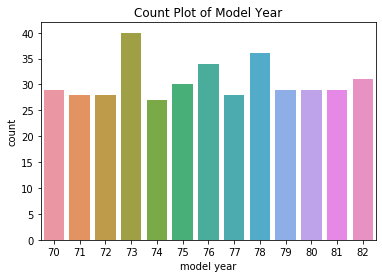

In [15]:
sns.countplot(df['model year'])
plt.title('Count Plot of Model Year')
plt.show()
#The models have a relatively uniform distribution over the years from 1970 to 1982

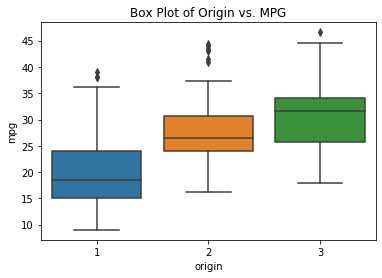

In [16]:
sns.boxplot(data=df, y='mpg', x='origin')
plt.title('Box Plot of Origin vs. MPG')
plt.show()
#Origin 1 = USA  #Origin 2 = Europe  #Origin 3 = Japan
#From the following figure, we can see that japanese cars have the best MPG followed by european cars then US cars

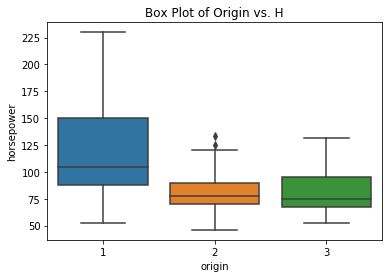

In [17]:
sns.boxplot(data=df, y='horsepower', x='origin')
plt.title('Box Plot of Origin vs. H')
plt.show()
#From the following figure, we can see that US cars are the most powerful followed by european cars and japanese cars

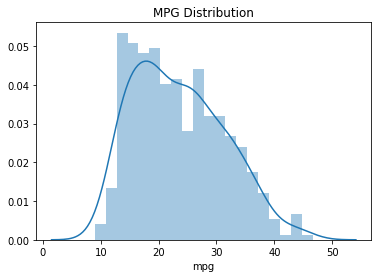

In [18]:
sns.distplot(df.mpg, bins=20)
plt.title('MPG Distribution')
plt.show()

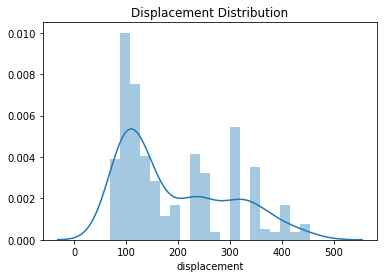

In [19]:
sns.distplot(df.displacement, bins=20)
plt.title('Displacement Distribution')
plt.show()

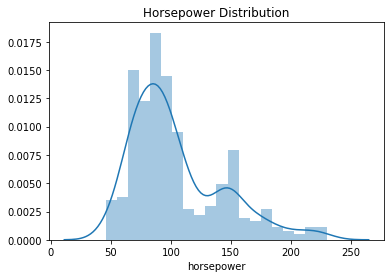

In [20]:
sns.distplot(df.horsepower, bins=20)
plt.title('Horsepower Distribution')
plt.show()

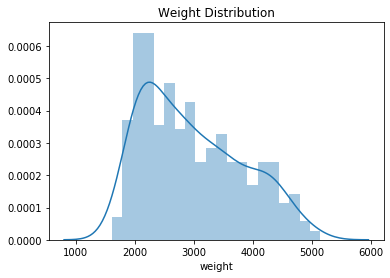

In [21]:
sns.distplot(df.weight, bins=20)
plt.title('Weight Distribution')
plt.show()

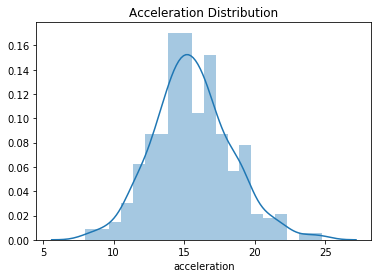

In [22]:
sns.distplot(df.acceleration, bins=20)
plt.title('Acceleration Distribution')
plt.show()

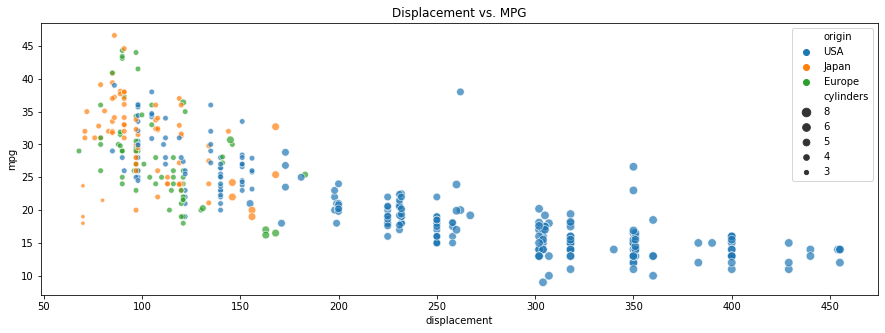

In [23]:
df.origin.replace([1, 2, 3], ['USA', 'Europe', 'Japan'], inplace=True)
plt.figure(figsize=(15, 5))
sns.scatterplot(x = 'displacement', y = 'mpg', data = df, hue = 'origin', size = 'cylinders',  size_order = [8, 6, 5, 4, 3], alpha=0.7)
plt.title('Displacement vs. MPG')
plt.show()
#From the following figure, we can see that:
#There is an inversely proportional relation between displacement and MPG regardless of the origin
#US cars have larger displacement engings (mostly with 6 or 8 cylinders) and the lower MPG
#European and japanese cars have significantly smaller displacement engins (4 cylinders) and higher MPG compared to US cars

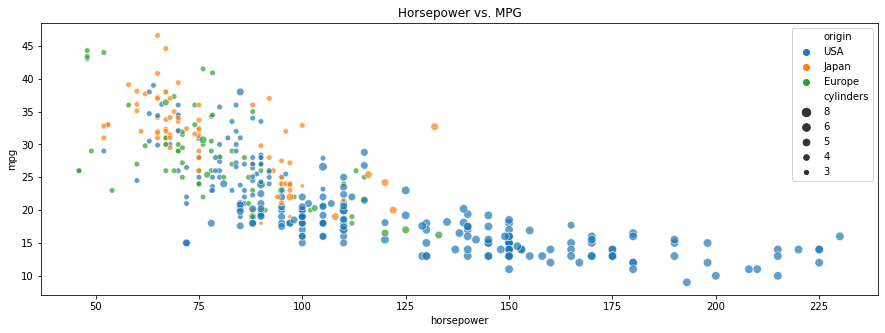

In [24]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = 'horsepower', y = 'mpg', data = df, hue = 'origin', size = 'cylinders', size_order = [8, 6, 5, 4, 3] , alpha=0.7)
plt.title('Horsepower vs. MPG')
plt.show()
#From the following figure, we can see that:
#There is an inversely proportional relation between horsepower and MPG regardless of the origin
#US cars are more powerful than european and japanese cars with lower MPG (4, 6, 8 cylinders)
#European and japanese cars have significantly less power compared to US cars and higher MPG (4 cylinders)

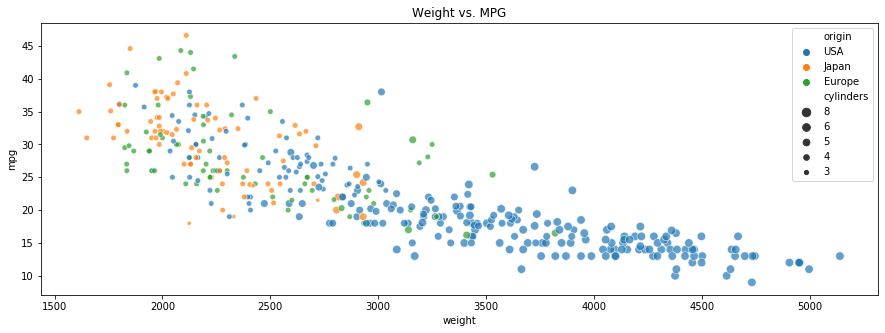

In [25]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = 'weight', y = 'mpg', data = df, hue = 'origin', size = 'cylinders', size_order = [8, 6, 5, 4, 3] , alpha=0.7)
plt.title('Weight vs. MPG')
plt.show()
#From the following figure, we can see that:
#There is an inversely proportional relation between weight and MPG regardless of the origin
#US cars are heavier than european and japanese cars with lower MPG (4, 6, 8 cylinders)
#European and japanese cars are lighter compared to US cars with higher MPG (4 cylinders)

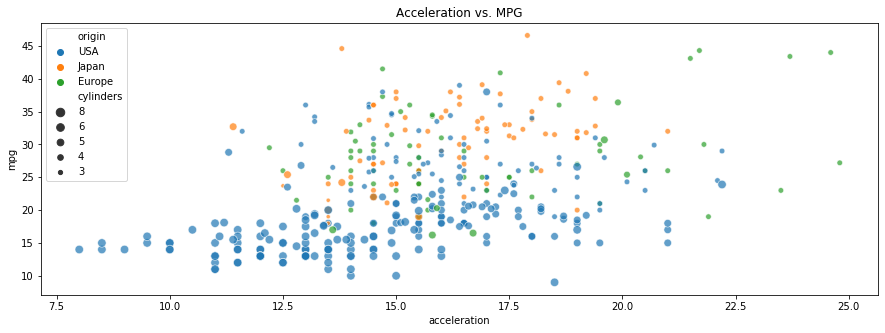

In [26]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = 'acceleration', y = 'mpg', data = df, hue = 'origin', size = 'cylinders', size_order = [8, 6, 5, 4, 3] , alpha=0.7)
plt.title('Acceleration vs. MPG')
plt.show()
#From the following figure, we can see that:
#There is an proportional relation between acceleration and MPG regardless of the origin
#US cars are faster from 0 to 60 MPH than european and japanese cars with lower MPG (4, 6, 8 cylinders)
#European and japanese cars are slower from 0 to 60 MPH compared to US cars with higher MPG (4 cylinders)

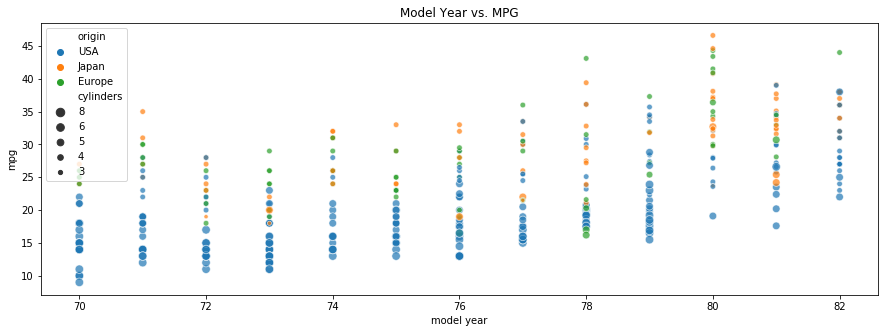

In [27]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = 'model year', y = 'mpg', data = df, hue = 'origin', size = 'cylinders', size_order = [8, 6, 5, 4, 3] , alpha=0.7)
plt.title('Model Year vs. MPG')
plt.show()
#From the following figure, we can see that:
#There is an proportional relation between model year and MPG regardless of the origin
#US cars have lower MPG regardless of the model year compared to european and japanese cars (4, 6, 8 cylinders)
#European and japanese cars have higher MPG regardless of the model year (4 cylinders)

In [28]:
print('Best MPG cars:')
df.nlargest(3, 'mpg')

Best MPG cars:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86,65.0,2110,17.9,80,Japan,mazda glc
329,44.6,4,91,67.0,1850,13.8,80,Japan,honda civic 1500 gl
325,44.3,4,90,48.0,2085,21.7,80,Europe,vw rabbit c (diesel)


In [29]:
print('Worst MPG cars:')
df.nsmallest(3, 'mpg')

Worst MPG cars:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,9.0,8,304,193.0,4732,18.5,70,USA,hi 1200d
25,10.0,8,360,215.0,4615,14.0,70,USA,ford f250
26,10.0,8,307,200.0,4376,15.0,70,USA,chevy c20


In [30]:
print('Highest horsepower cars:')
df.nlargest(3, 'horsepower')

Highest horsepower cars:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
116,16.0,8,400,230.0,4278,9.5,73,USA,pontiac grand prix
8,14.0,8,455,225.0,4425,10.0,70,USA,pontiac catalina
13,14.0,8,455,225.0,3086,10.0,70,USA,buick estate wagon (sw)


In [31]:
print('Lowest horsepower cars:')
df.nsmallest(3, 'horsepower')

Lowest horsepower cars:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
19,26.0,4,97,46.0,1835,20.5,70,Europe,volkswagen 1131 deluxe sedan
102,26.0,4,97,46.0,1950,21.0,73,Europe,volkswagen super beetle
244,43.1,4,90,48.0,1985,21.5,78,Europe,volkswagen rabbit custom diesel


In [32]:
print('Heaviest cars:')
df.nlargest(3, 'weight')

Heaviest cars:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
44,13.0,8,400,175.0,5140,12.0,71,USA,pontiac safari (sw)
103,11.0,8,400,150.0,4997,14.0,73,USA,chevrolet impala
42,12.0,8,383,180.0,4955,11.5,71,USA,dodge monaco (sw)


In [33]:
print('Lightest cars:')
df.nsmallest(3, 'weight')

Lightest cars:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
54,35.0,4,72,69.0,1613,18.0,71,Japan,datsun 1200
144,31.0,4,76,52.0,1649,16.5,74,Japan,toyota corona
343,39.1,4,79,58.0,1755,16.9,81,Japan,toyota starlet


In [34]:
print('Slowest cars from 0 to 60 MPH:')
df.nlargest(3, 'acceleration')

Slowest cars from 0 to 60 MPH:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
299,27.2,4,141,71.0,3190,24.8,79,Europe,peugeot 504
394,44.0,4,97,52.0,2130,24.6,82,Europe,vw pickup
326,43.4,4,90,48.0,2335,23.7,80,Europe,vw dasher (diesel)


In [35]:
print('Fastest cars from 0 to 60 MPH:')
df.nsmallest(3, 'acceleration')

Fastest cars from 0 to 60 MPH:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
11,14.0,8,340,160.0,3609,8.0,70,USA,plymouth 'cuda 340
7,14.0,8,440,215.0,4312,8.5,70,USA,plymouth fury iii
9,15.0,8,390,190.0,3850,8.5,70,USA,amc ambassador dpl


In [36]:
df.origin.replace(['USA', 'Europe', 'Japan'], [1, 2, 3], inplace=True)
#sns.relplot(x = 'horsepower', y = 'mpg', data = df, col = 'cylinders')
#plt.show()
#sns.relplot(x = 'horsepower', y = 'mpg', data = df, col = 'origin')
#plt.show()

In [37]:
df['origin'] = df.origin.astype('category')

In [38]:
df.corr()

,mpg,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.804196,-0.775608,-0.831741,0.420289,0.579267
displacement,-0.804196,1.000000,0.897518,0.932826,-0.543684,-0.370147
horsepower,-0.775608,0.897518,1.000000,0.863600,-0.688022,-0.416841
weight,-0.831741,0.932826,0.863600,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.543684,-0.688022,-0.417457,1.000000,0.288137
model year,0.579267,-0.370147,-0.416841,-0.306564,0.288137,1.000000


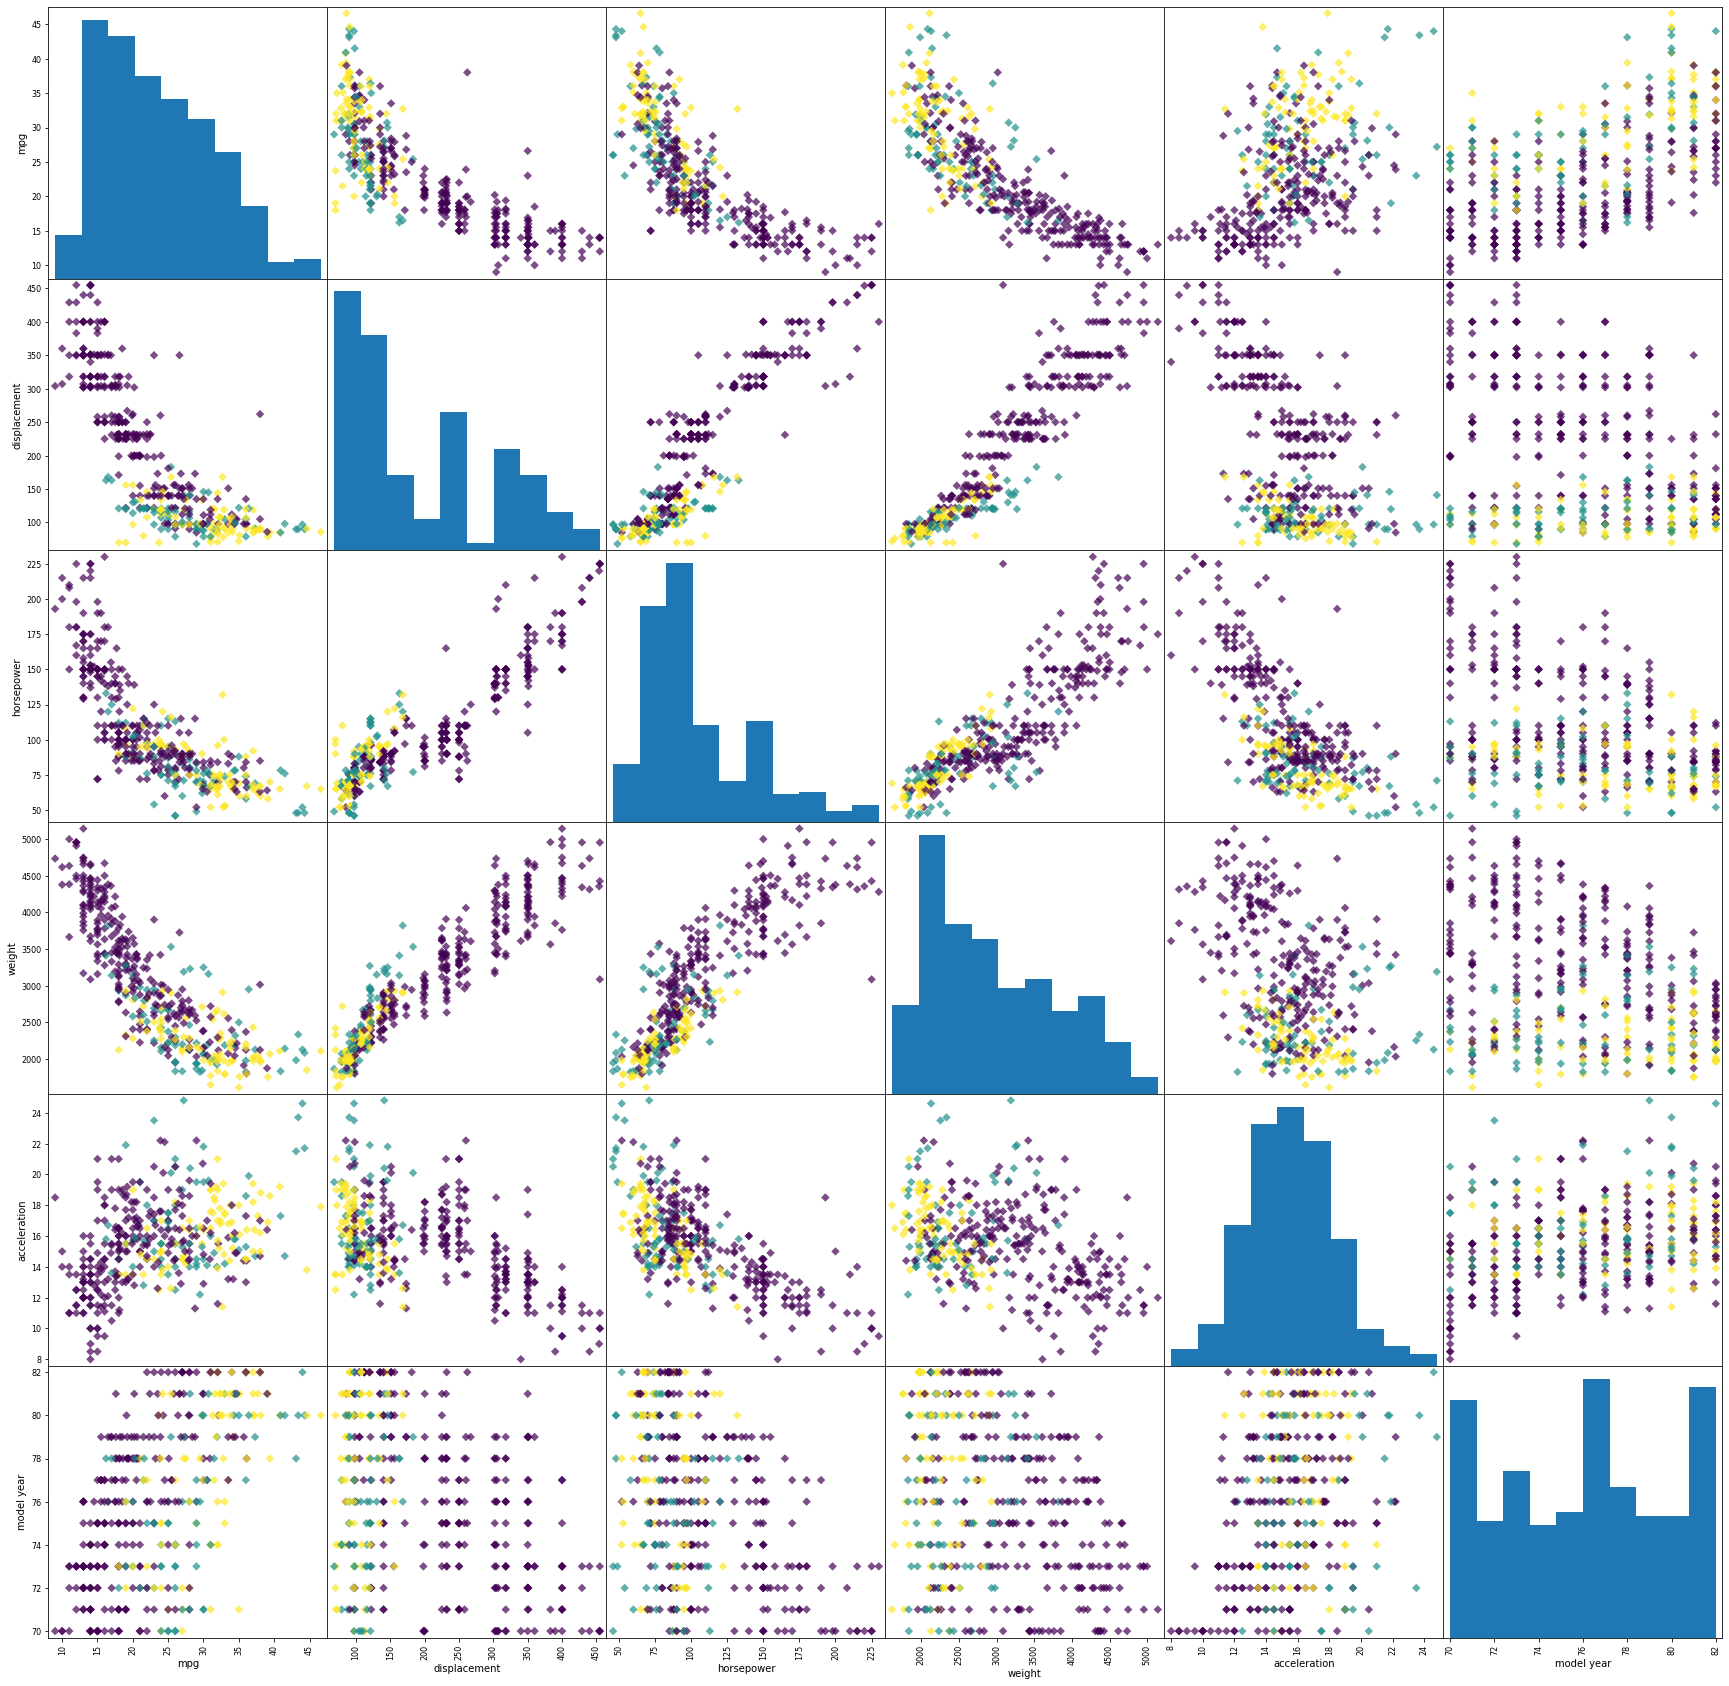

In [39]:
#scatter_matrix
pd.plotting.scatter_matrix(df, figsize = [30, 30], c = df.origin, marker = 'D', alpha = 0.7)
plt.show()

Linear Regression

In [40]:
#LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

df_dum = pd.get_dummies(df)

X = df_dum.drop(['mpg', 'car name'], axis=1).values
#X = scale(X)
y = df_dum.mpg.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('Model Score:', reg.score(X_test, y_test))

Model Score: 0.8711861081408453


In [41]:
#Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(0.1, 20)}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

ridge_cv_pred = ridge_cv.predict(X_test)
print('Params:', ridge_cv.best_params_)
ridge_cv.best_score_
print('Model Score:', ridge_cv.score(X_test, y_test))

Params: {'alpha': 3.1}
Model Score: 0.8714537723599997


In [42]:
#Lasso 
from sklearn.linear_model import Lasso

param_grid = {'alpha': np.arange(0.1, 20), 'normalize': [True, False]}

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

lasso_cv_pred = lasso_cv.predict(X_test)
print('Params:', lasso_cv.best_params_)
lasso_cv.best_score_
print('Model Score:', lasso_cv.score(X_test, y_test))


Params: {'alpha': 0.1, 'normalize': False}
Model Score: 0.8644436137668698


In [43]:
#All three model nearly scored the same so any one of them is usable 
#Actually in application it's better to put the model in a pipeline

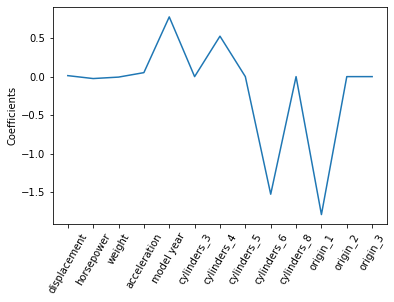

In [44]:
lasso = Lasso(alpha = 0.1, normalize = False)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
#print(lasso.score(X_test, y_test))

lasso_coef = lasso.fit(X_train, y_train).coef_
names = df_dum.drop(['mpg', 'car name'], axis=1).columns
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [47]:
df.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307,130.000000,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165.000000,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150.000000,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150.000000,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140.000000,3449,10.5,70,1,ford torino
5,15.0,8,429,198.000000,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454,220.000000,4354,9.0,70,1,chevrolet impala
7,14.0,8,440,215.000000,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455,225.000000,4425,10.0,70,1,pontiac catalina
9,15.0,8,390,190.000000,3850,8.5,70,1,amc ambassador dpl
